In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import util_stat

In [14]:
# Test the differences in mean // here we test difference in mean of 2 samples : 
# pregnancy length for first baby and other baby

class TestMeanByPermutation(util_stat.HypothesisTest):
    def TestStatistic(self, data):
        data1, data2 = data
        return abs(data1.mean() - data2.mean())
    
    def MakeModel(self):
        data1, data2 = self.data
        self.n, self.m = len(data1), len(data2)
        self.pool = np.hstack((data1, data2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    

In [3]:
# Test the correlation
class TestCorrelation(util_stat.HypothesisTest):
    def TestStatistic(self, data):
        data1, data2 = data 
        return abs(util_stat.Corr(data1, data2))
    
    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys


In [4]:
# Test proportions
# Here’s a version of HypothesisTest that answers that question:
class DiceTest(util_stat.HypothesisTest):
    def TestStatistic(self, data):
        observed = data
        n = sum(observed)
        expected = np.ones(6) * n / 6
        test_stat = sum(abs(observed - expected))
        return test_stat

    #simulate
    def RunModel(self):
        n = sum(self.data)
        values = [1, 2, 3, 4, 5, 6]
        rolls = np.random.choice(values, n, replace=True)
        hist = util_stat.Hist(rolls)
        freqs = hist.Freqs(values)
        return freqs

diceTest = DiceTest(data=[8, 9, 22, 1, 8, 11])

26.666666666666664


In [5]:
diceTest.PValue() 
# result is < 5% (0.005), means that the null hypo is less likely to be happened ( fair )

0.007

In [6]:
diceTest.test_cdf.Prob(26.6666666666666) # t = 1 - p_value

0.993

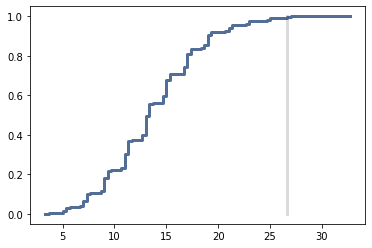

In [7]:
diceTest.PlotCdf()

In [8]:
# Test proportion by Chi2
class DiceTestChi2(DiceTest):
    def TestStatistic(self, data):
        observed = data
        n = sum(observed)
        expected = np.ones(6) * n / 6
        test_stat = sum((observed - expected) **2 / observed)
        return test_stat

    #simulate
    def RunModel(self):
        n = sum(self.data)
        values = [1, 2, 3, 4, 5, 6]
        rolls = np.random.choice(values, n, replace=True)
        hist = util_stat.Hist(rolls)
        freqs = hist.Freqs(values)
        return freqs

85.79748877665544
0.0


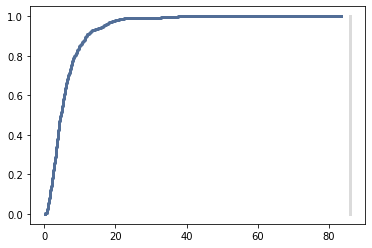

In [9]:
diceTestChi2 = DiceTestChi2(data=[8, 9, 22, 1, 8, 11])
print(diceTestChi2.PValue()) 
diceTestChi2.PlotCdf()

In [10]:
#make comparison
normals = []
chi2s = []
for _ in range(500):
    normal = diceTest.PValue() 
    chi2 = diceTestChi2.PValue()
    normals.append(normal)
    chi2s.append(chi2)

C:\Users\APC\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


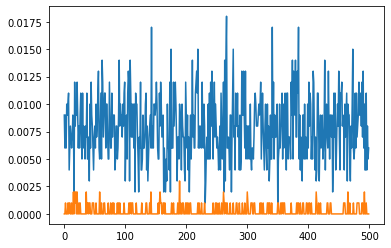

In [11]:
plt.plot([i for i in range(500)], normals)
plt.plot([i for i in range(500)], chi2s)
plt.show()

In [12]:
#Ex1

In [13]:
#Ex2